In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
vehicle  =  pd.read_table('vehicle.txt')
vehicle.head()

,vehicle_label,vehicle_type,width,height
0,1,motorcycle,67,106
1,2,car,170,250
2,3,truck,255,400
3,1,motorcycle,100,140
4,1,motorcycle,70,180


In [3]:
lookup_vehicle_name = dict(zip(vehicle.vehicle_label.unique(), vehicle.vehicle_type.unique()))
lookup_vehicle_name

{1: 'motorcycle', 2: 'car', 3: 'truck'}

In [4]:
vehicle.shape

(26, 4)

In [5]:
vehicle.describe()

,vehicle_label,width,height
count,26.000000,26.000000,26.000000
mean,2.153846,188.923077,292.153846
std,0.784465,70.957409,104.906698
min,1.000000,67.000000,106.000000
25%,2.000000,152.500000,222.500000
50%,2.000000,185.000000,255.000000
75%,3.000000,247.500000,397.500000
max,3.000000,300.000000,440.000000


In [6]:
print(vehicle.groupby('vehicle_type').size())

vehicle_type
car           10
motorcycle     6
truck         10
dtype: int64


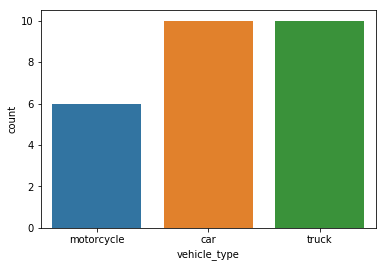

In [7]:
import seaborn as sns
sns.countplot(vehicle['vehicle_type'],label="Count")
plt.show()

In [8]:
from sklearn.model_s election import train_test_split
X = vehicle[['width','height']]
y = vehicle[['vehicle_label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train, y_train)

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn.score(X_test, y_test)

1.0

In [12]:
vehicle_prediction = knn.predict([[70, 120]])
lookup_vehicle_name[vehicle_prediction[0]]

'motorcycle'

In [13]:
vehicle_prediction = knn.predict([[180, 300]])
lookup_vehicle_name[vehicle_prediction[0]]

'car'

In [14]:
vehicle_prediction = knn.predict([[250, 400]])
lookup_vehicle_name[vehicle_prediction[0]]

'truck'

In [15]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = vehicle[['width', 'height']]
y = vehicle['vehicle_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_vehicle_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [16]:
from adspy_shared_utilities import plot_vehicle_knn

plot_vehicle_knn(X_train, y_train, 5, 'uniform')

ModuleNotFoundError: No module named 'adspy_shared_utilities'